Hello everyone!\
This is our notebook for our parser
This project was done by ```Abdrakhmanov Yelnur```, ```Ananyan Karen``` and ```Aslan Jeleubay``` from ```SE-2203```\
GitHub Repository link: https://github.com/prenl/headhunter_parser/

In the code cell below, we import all necessary packages using ```pip``` (python package index)

In [ ]:
# Installing all necessary packages
!pip3 install jupyter
!pip3 install pandas
!pip3 install csv
!pip3 install jupyter
!pip3 install requests
!pip3 install bs4

Then, we start our program from inputing some our functions and libraries

In [1]:
import csv
import pandas
import requests
from pathlib import Path
from bs4 import BeautifulSoup

from hh_parser import find_links, parse_link
from data_handler import parse_resumes
from scripts import *

We have ```parse_resumes``` function below, that takes only one argument -> ```job_title``` \
Using this text, our ```find_links``` function finds the ```20``` first links that satisfy the ```job_title```

Then, all the links ```find_links``` function had found we parse through our function ```parse_link```

Using ```requests``` and ```bs4``` libraries, we parse each link returning dictionary of page

    resume = {
        'title': title,
        'specialization': specialization,
        'salary': salary,
        'age': age,
        'employment': employment,
        'schedule': schedule,
        'experience_years': experience_years,
        'experience_months': experience_months,
        'citizenship': citizenship,
        'sex': sex,
        'link': link
    }

If some information wasn't found in resume, it shows "Unspecified"

As soon as ``parse_link`` finishes with one link, ```parse_resumes``` immediately fills the table ``.csv`` that has the same name as ```job_title```
    


In [2]:
job_title = 'DevOps C'
number_of_resumes = 20
# parse_resumes(job_title, number_of_resumes)

To output out table, firstly, we should open our ```.csv``` file and convert it to ```DataFrame``` object, using ```read_csv``` method from ```pandas```\

and after this, we output the table using ```head``` method of ```pandas.DataFrame class```

In [ ]:
dataframe: pandas.DataFrame = pandas.read_csv(job_title + '.csv')
dataframe.head(n=number_of_resumes)

```ENTERING TESTING ZONE ONE```

First test will be test of ```sorting script```\

here's the function to ```sort by age``` (ascending):

In [ ]:
sorted_by_age_dataframe = sort(dataframe, 'age', ascending=False)
sorted_by_age_dataframe.head(n=number_of_resumes)

function to ```sort by salary``` (ascending)

In [ ]:
sorted_by_salary_dataframe = sort(dataframe, 'salary', ascending=True)
sorted_by_salary_dataframe.head(n=number_of_resumes)

function to ```sort by experience``` (descending)

In [ ]:
sorted_by_experience_dataframe = sort(dataframe, 'experience_years', ascending=False)
sorted_by_experience_dataframe.head(n=number_of_resumes)

function to ```sort by title``` (ascending)

In [ ]:
sorted_by_experience_dataframe = sort(dataframe, 'title', ascending=True)
sorted_by_experience_dataframe.head(n=number_of_resumes)

```ENTERING TESTING ZONE TWO```

function to ```calculate the minimum salary```:

In [ ]:
minimum_salary_dataframe = get_min(dataframe, 'salary')
print(minimum_salary_dataframe)

function to ```calculate the maximum salary```:

In [ ]:
maximum_salary_dataframe = get_max(dataframe, 'salary')
print(maximum_salary_dataframe)

function to ```calculate the average salary```:

In [ ]:
average_salary: str = get_average(dataframe, 'salary')
print("Average salary for \"" + job_title + "\" is: " + average_salary)

```ENTERING TESTING ZONE THREE```

function to ```calculate the minimum, maximum, average salary for each sex```:\
and function to ```calculate the minimum, maximum, average age for each sex```:

In [12]:
grouped_by_sex = dataframe.groupby(['sex'])
print(get_salary_stats(grouped_by_sex))
print()
print(get_age_stats(grouped_by_sex))

            min        max       average
sex                                     
False  100000.0  2800000.0  1.084240e+06
True   300000.0   300000.0  3.000000e+05

       min  max  average
sex                     
False   24   47    36.00
True    32   37    33.75


function to ```calculate the minimum, maximum, average salary for each specialization```:\
and function to ```calculate the minimum, maximum, average age for each specialization```:

In [19]:
grouped_by_specialization = dataframe.groupby(['specialization'])
print(get_salary_stats(grouped_by_specialization))
print()
print(get_age_stats(grouped_by_specialization))

                                                    min        max     average
specialization                                                                
Chief technical officer (CTO)                       NaN        NaN         NaN
DevOps-инженер                                 100000.0  2664420.0   974884.00
Programmer, developer                          300000.0   300000.0   300000.00
System administrator                                NaN        NaN         NaN
Tester                                              NaN        NaN         NaN
Директор по информационным технологиям (CIO)   450000.0   450000.0   450000.00
Программист, разработчик                       666105.0  2800000.0  1421613.75
Руководитель группы разработки                1500000.0  1500000.0  1500000.00
Сетевой инженер                                     NaN        NaN         NaN
Системный администратор                        500000.0   500000.0   500000.00

                                              min  

function to ```calculate the minimum, maximum, average salary for each citizenship```:\
and function to ```calculate the minimum, maximum, average age for each citizenship```:

In [20]:
grouped_by_citizenship = dataframe.groupby(['citizenship'])
print(get_salary_stats(grouped_by_citizenship))
print()
print(get_age_stats(grouped_by_citizenship))

                  min        max     average
citizenship                                 
Казахстан    450000.0  2800000.0  1391846.25
Россия       100000.0  1000000.0   377500.00
Украина      666105.0   666105.0   666105.00


```ENTERING TESTING ZONE FOUR```

function to ```calculate the amount of males``` from each country

In [6]:
print(get_sex_stats(dataframe.groupby('citizenship')))

           Женщина  Мужчина
Казахстан       12        3
Россия           3        1
Украина          1        0


```ENTERING TESTING ZONE FIVE```

Here's some plots:

<AxesSubplot: title={'center': 'salary by citizenship'}, xlabel='citizenship'>

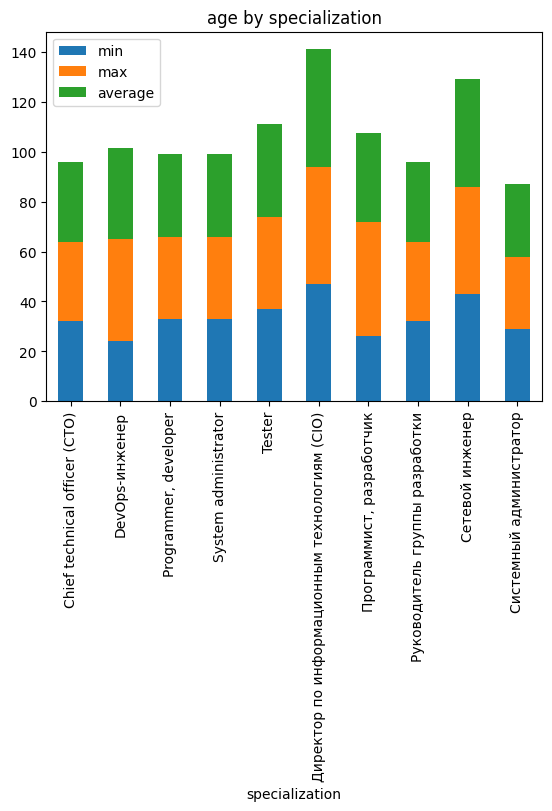

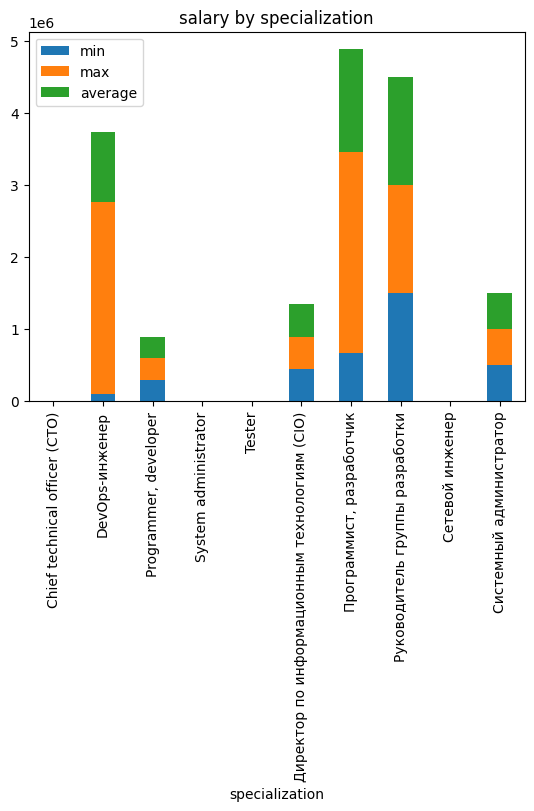

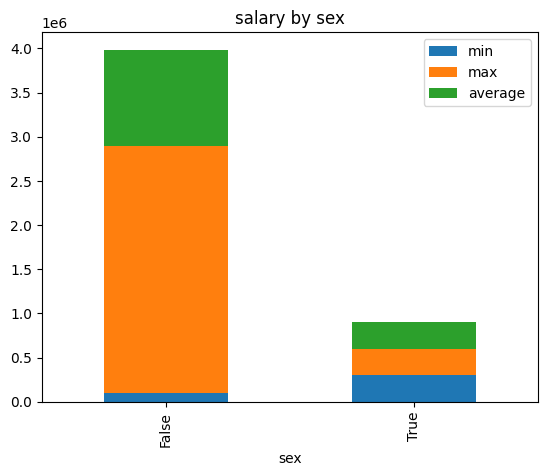

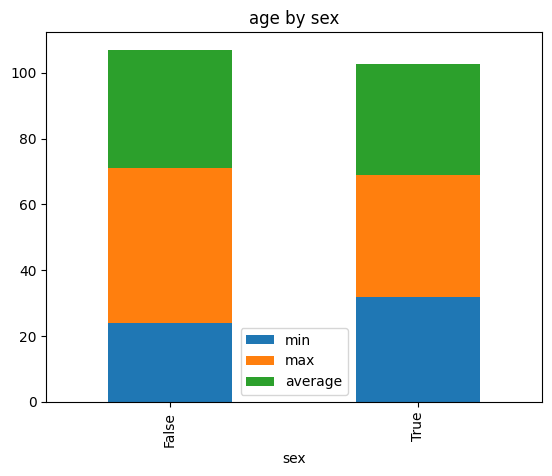

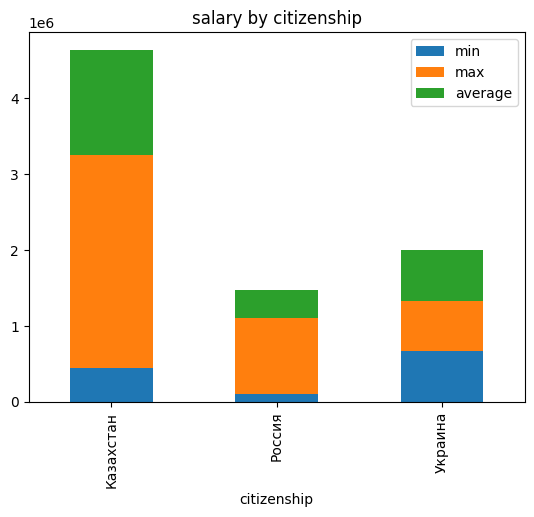

In [11]:
pd.DataFrame(get_age_stats(dataframe.groupby('specialization'))).plot(kind='bar', stacked=True, title='age by specialization')
pd.DataFrame(get_salary_stats(dataframe.groupby('specialization'))).plot(kind='bar', stacked=True, title='salary by specialization')
pd.DataFrame(get_salary_stats(dataframe.groupby('sex'))).plot(kind='bar', stacked=True, title='salary by sex')
pd.DataFrame(get_age_stats(dataframe.groupby('sex'))).plot(kind='bar', stacked=True, title='age by sex')
pd.DataFrame(get_salary_stats(dataframe.groupby('citizenship'))).plot(kind='bar', stacked=True, title='salary by citizenship')
